In [1]:
import os, sys

__file__ = '/Users/justin/SynologyDrive/Learning Materials/School/Grad School/CSE 6140 Algorithms/Project/CSE6140-TSP-Project/Archived Reports/Genetic Algorithm QRTD.ipynb'
sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath(__file__))))

In [2]:
import genetic_algorithm as ga
import utilities as u
import tracer as t

In [3]:
import datetime as dt

# Champaign, 52643
instance_name, tsp_data = u.load_data('../DATA/Berlin.tsp')
optimal = 7542

In [15]:
import numpy as np
candidate_quality = np.linspace(1.1, 2, 6)
results = {}
for q in candidate_quality:
    results[q] = {}
    for runtime in np.linspace(1, 60, 6):
        results[q][runtime] = []
        for i in range(10):
            print(q, runtime, i)
            score, solution = ga.solve(data=tsp_data, 
                                         timer=u.early_stop_checker(seconds=runtime, target_cost=q * optimal), 
                                         tracer=t.NullTracer())
            results[q][runtime].append(score)

1.1 1.0 0
1.1 1.0 1
1.1 1.0 2
1.1 1.0 3
1.1 1.0 4
1.1 1.0 5
1.1 1.0 6
1.1 1.0 7
1.1 1.0 8
1.1 1.0 9
1.1 15.75 0
1.1 15.75 1
1.1 15.75 2
1.1 15.75 3
1.1 15.75 4
1.1 15.75 5
1.1 15.75 6
1.1 15.75 7
1.1 15.75 8
1.1 15.75 9
1.1 30.5 0
1.1 30.5 1
1.1 30.5 2
1.1 30.5 3
1.1 30.5 4
1.1 30.5 5
1.1 30.5 6
1.1 30.5 7
1.1 30.5 8
1.1 30.5 9
1.1 45.25 0
1.1 45.25 1
1.1 45.25 2
1.1 45.25 3
1.1 45.25 4
1.1 45.25 5
1.1 45.25 6
1.1 45.25 7
1.1 45.25 8
1.1 45.25 9
1.1 60.0 0
1.1 60.0 1
1.1 60.0 2
1.1 60.0 3
1.1 60.0 4
1.1 60.0 5
1.1 60.0 6
1.1 60.0 7
1.1 60.0 8
1.1 60.0 9
1.28 1.0 0
1.28 1.0 1
1.28 1.0 2
1.28 1.0 3
1.28 1.0 4
1.28 1.0 5
1.28 1.0 6
1.28 1.0 7
1.28 1.0 8
1.28 1.0 9
1.28 15.75 0
1.28 15.75 1
1.28 15.75 2
1.28 15.75 3
1.28 15.75 4
1.28 15.75 5
1.28 15.75 6
1.28 15.75 7
1.28 15.75 8
1.28 15.75 9
1.28 30.5 0
1.28 30.5 1
1.28 30.5 2
1.28 30.5 3
1.28 30.5 4
1.28 30.5 5
1.28 30.5 6
1.28 30.5 7
1.28 30.5 8
1.28 30.5 9
1.28 45.25 0
1.28 45.25 1
1.28 45.25 2
1.28 45.25 3
1.28 45.25 4
1.28 45.25 5
1.

In [17]:
first_runtime = results[1.1]

In [18]:
first_runtime

{1.0: [18120.517439008738,
  18642.352832215827,
  17787.291291936857,
  18472.610954018826,
  17837.923308560043,
  17866.42222210556,
  17395.55450423183,
  17472.065291934032,
  17313.42763386944,
  15888.735799432561],
 15.75: [9711.658864067273,
  10144.175297856504,
  9283.2536966266,
  9870.011556391828,
  9751.19059569058,
  8919.226276842239,
  9349.554778271007,
  9360.557333833282,
  9874.742203796246,
  9876.882729759209],
 30.5: [9441.64618879314,
  8502.030226787607,
  8641.785054980784,
  8424.388042152746,
  8538.742353163807,
  8844.87025614741,
  8506.298408589837,
  9102.362872261787,
  8493.760686544852,
  9445.835679917756],
 45.25: [8173.21884828543,
  8777.444515103265,
  8446.452213342318,
  8587.888962621504,
  8481.606169022232,
  8299.897377894824,
  8835.299247894054,
  8469.70959912186,
  8982.85912916674,
  8670.25612072168],
 60.0: [8507.940290570928,
  8432.089581575885,
  8648.618272990157,
  8960.163750173046,
  8538.445760026834,
  8270.259382172384,


In [40]:
key_set = []
time_set = []
for key, times in first_runtime.items():
    key_set.append(key)
    time_set.append(times)

In [42]:
key_set

[1.0, 15.75, 30.5, 45.25, 60.0]

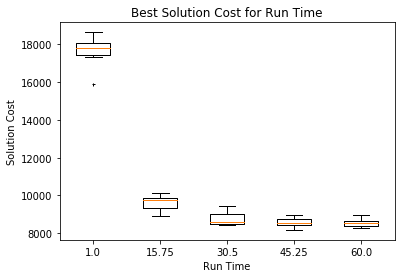

In [44]:
fig, ax = plt.subplots()
pos = np.array(range(len(time_set))) + 1
bp = ax.boxplot(time_set, 
                sym='k+', 
                labels=key_set,
                positions=pos)

ax.set_xlabel('Run Time')
ax.set_ylabel('Solution Cost')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.title('Best Solution Cost for Run Time')
plt.show()

In [87]:
np.linspace(1, 30, 6)

array([ 1. ,  6.8, 12.6, 18.4, 24.2, 30. ])

In [30]:
tracer = t.MultiRunTracer()

for _ in range(100):
    print(_)
    score, _ = ga.solve(data=tsp_data, 
                             timer=u.early_stop_checker(seconds=25, target_cost=optimal+0.5), 
                             tracer=tracer)
    tracer.next_run()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [31]:
def convert_run_to_relative_run(runs, optimal):
    relative_runs = []
    for run in runs:
        initial_time = run[0][0]
        relative_run = [((timestamp - initial_time).total_seconds(), score / optimal) for timestamp, score in run]
        relative_runs.append(relative_run)
    return relative_runs

def run_hits_quality_in_time(run,q,t):
    for elapsed_time, relative_score in run:
        if relative_score < q and elapsed_time <= t:
            return 1
    return 0

def probability_to_solve_in_limited_time(runs, q, t):
    counts = sum(run_hits_quality_in_time(run, q, t) for run in runs)
    return counts / len(runs)
        

In [32]:
relative_runs = convert_run_to_relative_run(tracer._runs, optimal=optimal)

In [24]:
import numpy as np
np.linspace(1,2,10)

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

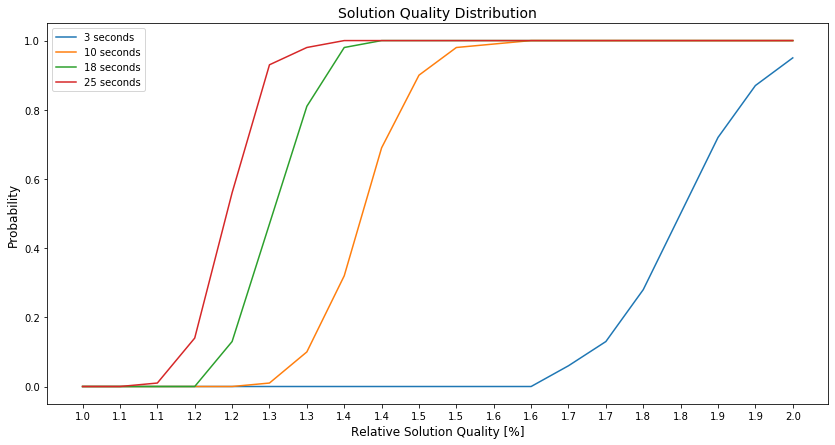

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,7))
plt.title('Solution Quality Distribution', size=14)
plt.ylabel('Probability', size=12)
plt.xlabel('Relative Solution Quality [%]', size=12)
qualities = np.linspace(1,2,20)
plt.xticks(list(range(len(qualities))), list(map(lambda x: round(x, 1), qualities)), rotation='horizontal')

for t in np.linspace(3, 25, 4):
    line_data = [probability_to_solve_in_limited_time(relative_runs, q, t=t) for q in qualities]
    plt.plot(line_data, label=f'{int(round(t, 0))} seconds')
plt.legend();

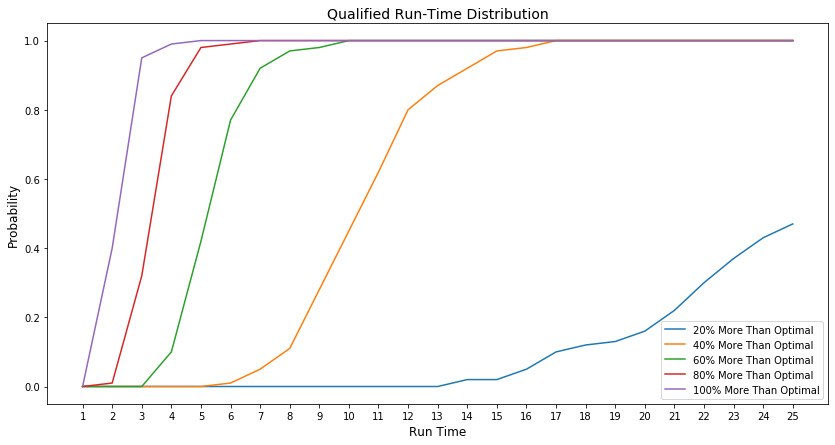

In [113]:
# QTRD Plots
# Given a number of seconds
#   and a vector of qualities

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,7))
plt.title('Qualified Run-Time Distribution', size=14)
plt.ylabel('Probability', size=12)
plt.xlabel('Run Time', size=12)
times = np.linspace(1,25,25)
plt.xticks(list(range(len(times))), list(map(lambda x: int(round(x, 0)), times)), rotation='horizontal')

for q in np.linspace(1.2,2,5):
    line_data = [probability_to_solve_in_limited_time(relative_runs, q, t=t) for t in times]
    plt.plot(line_data, label=f'{int(round((q-1)*100,0))}% More Than Optimal');
plt.legend();

In [92]:
import numpy as np

def find_solutions_of_minimum_quality(q):
    runtimes = np.linspace(1, 20, 20)
    results = []
    iteration_count = 15
    for runtime in runtimes:
        total_sum = 0
        for i in range(iteration_count):
            print(q, runtime, i)
            score, solution = ga.solve(data=tsp_data, 
                                         timer=u.early_stop_checker(seconds=runtime, target_cost=q * optimal), 
                                         tracer=t.InMemoryTracer())
            total_sum += 1 if (score / optimal) < q else 0
        results.append(total_sum / iteration_count)
    return results

In [93]:
run_results = [find_solutions_of_minimum_quality(q) for q in [1.0625, 1.125, 1.25]

1.5 1.0 0
1.5 1.0 1
1.5 1.0 2
1.5 1.0 3
1.5 1.0 4
1.5 1.0 5
1.5 1.0 6
1.5 1.0 7
1.5 1.0 8
1.5 1.0 9
1.5 1.0 10
1.5 1.0 11
1.5 1.0 12
1.5 1.0 13
1.5 1.0 14
1.5 2.0 0
1.5 2.0 1
1.5 2.0 2
1.5 2.0 3
1.5 2.0 4
1.5 2.0 5
1.5 2.0 6
1.5 2.0 7
1.5 2.0 8
1.5 2.0 9
1.5 2.0 10
1.5 2.0 11
1.5 2.0 12
1.5 2.0 13
1.5 2.0 14
1.5 3.0 0
1.5 3.0 1
1.5 3.0 2
1.5 3.0 3
1.5 3.0 4
1.5 3.0 5
1.5 3.0 6
1.5 3.0 7
1.5 3.0 8
1.5 3.0 9
1.5 3.0 10
1.5 3.0 11
1.5 3.0 12
1.5 3.0 13
1.5 3.0 14
1.5 4.0 0
1.5 4.0 1
1.5 4.0 2
1.5 4.0 3
1.5 4.0 4
1.5 4.0 5
1.5 4.0 6
1.5 4.0 7
1.5 4.0 8
1.5 4.0 9
1.5 4.0 10
1.5 4.0 11
1.5 4.0 12
1.5 4.0 13
1.5 4.0 14
1.5 5.0 0
1.5 5.0 1
1.5 5.0 2
1.5 5.0 3
1.5 5.0 4
1.5 5.0 5
1.5 5.0 6
1.5 5.0 7
1.5 5.0 8
1.5 5.0 9
1.5 5.0 10
1.5 5.0 11
1.5 5.0 12
1.5 5.0 13
1.5 5.0 14
1.5 6.0 0
1.5 6.0 1
1.5 6.0 2
1.5 6.0 3
1.5 6.0 4
1.5 6.0 5
1.5 6.0 6
1.5 6.0 7
1.5 6.0 8
1.5 6.0 9
1.5 6.0 10
1.5 6.0 11
1.5 6.0 12
1.5 6.0 13
1.5 6.0 14
1.5 7.0 0
1.5 7.0 1
1.5 7.0 2
1.5 7.0 3
1.5 7.0 4
1.5 7.0 5
1.5 7.0 6


In [ ]:
{1.5:[0.0,
 0.0,
 0.0,
 0.0,
 0.06666666666666667,
 0.13333333333333333,
 0.6666666666666666,
 0.8666666666666667,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]}

In [86]:
candidate_runtimes

array([1.1 , 1.28, 1.46, 1.64, 1.82, 2.  ])

In [94]:
run_results


[0.0,
 0.0,
 0.0,
 0.0,
 0.06666666666666667,
 0.13333333333333333,
 0.6666666666666666,
 0.8666666666666667,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline



In [84]:
#given a quality 
q = 
# Find percent of solutions at each run time where a solution was found.
run_time_percentages = []

for runtime, costs in first_runtime.items():
    percent_solved = (np.array(costs) <= q * optimal).sum() / len(costs)
    run_time_percentages.append(percent_solved)
run_time_percentages

SyntaxError: invalid syntax (<ipython-input-84-9c9daf434008>, line 2)

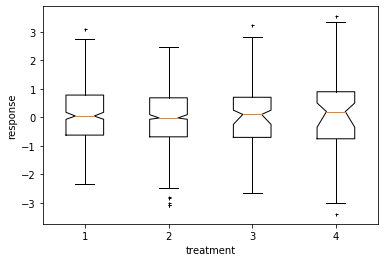

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

inc = 0.1
e1 = np.random.normal(0, 1, size=500)
e2 = np.random.normal(0, 1, size=500)
e3 = np.random.normal(0, 1 + inc, size=500)
e4 = np.random.normal(0, 1 + 2*inc, size=500)

treatments = [e1, e2, e3, e4]
med1, CI1 = (0.1, (-0.25, 0.25))
med2, CI2 = (0.2, (-0.35, 0.50))
medians = [None, None, med1, med2]
conf_intervals = [None, None, CI1, CI2]

fig, ax = plt.subplots()
pos = np.array(range(len(treatments))) + 1
bp = ax.boxplot(treatments, sym='k+', positions=pos,
                notch=1, bootstrap=5000,
                usermedians=medians,
                conf_intervals=conf_intervals)

ax.set_xlabel('treatment')
ax.set_ylabel('response')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

inc = 0.1
e1 = np.random.normal(0, 1, size=500)
e2 = np.random.normal(0, 1, size=500)
e3 = np.random.normal(0, 1 + inc, size=500)
e4 = np.random.normal(0, 1 + 2*inc, size=500)

treatments = [e1, e2, e3, e4]
med1, CI1 = (0.1, (-0.25, 0.25))
med2, CI2 = (0.2, (-0.35, 0.50))
medians = [None, None, med1, med2]
conf_intervals = [None, None, CI1, CI2]

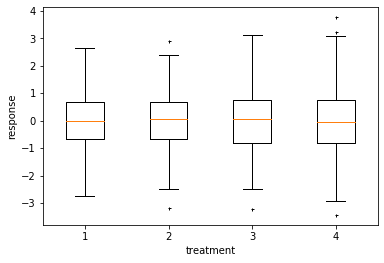

In [38]:
fig, ax = plt.subplots()
pos = np.array(range(len(treatments))) + 1
bp = ax.boxplot(treatments, 
                sym='k+', 
                positions=pos)

ax.set_xlabel('treatment')
ax.set_ylabel('response')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()